In [1]:
# import relevant libraries
import pandas as pd
import mlflow
import os
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

In [2]:
# read the dataset and get the training features
loans = pd.read_csv("../data/loan_data.csv")
X = loans.drop(columns="loan_status")
y = loans["loan_status"]

X_train, _, _, _ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=666)
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
10591,24.0,male,Master,84007.0,2,MORTGAGE,7200.0,MEDICAL,7.88,0.09,2.0,601,Yes
20512,27.0,male,Bachelor,60018.0,3,RENT,4800.0,DEBTCONSOLIDATION,14.65,0.08,7.0,676,Yes
42547,24.0,female,Bachelor,71962.0,0,RENT,9958.0,MEDICAL,14.71,0.14,4.0,674,No
1526,26.0,male,High School,49040.0,4,RENT,1400.0,VENTURE,11.86,0.03,4.0,611,Yes
33678,26.0,male,Associate,116414.0,2,MORTGAGE,5000.0,VENTURE,11.84,0.04,5.0,661,No


In [3]:
# load xgb classifier
with open("../run_ids/xgb_latest_run.txt", "r") as f:
    run_id = f.read()

path = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{path}/mlruns")
xgb_model = mlflow.sklearn.load_model(f"runs:/{run_id}/xgb")

In [4]:
# split features into numerical and categorical
numerical = X_train.select_dtypes(exclude="object").columns
categorical = X_train.select_dtypes(include="object").columns

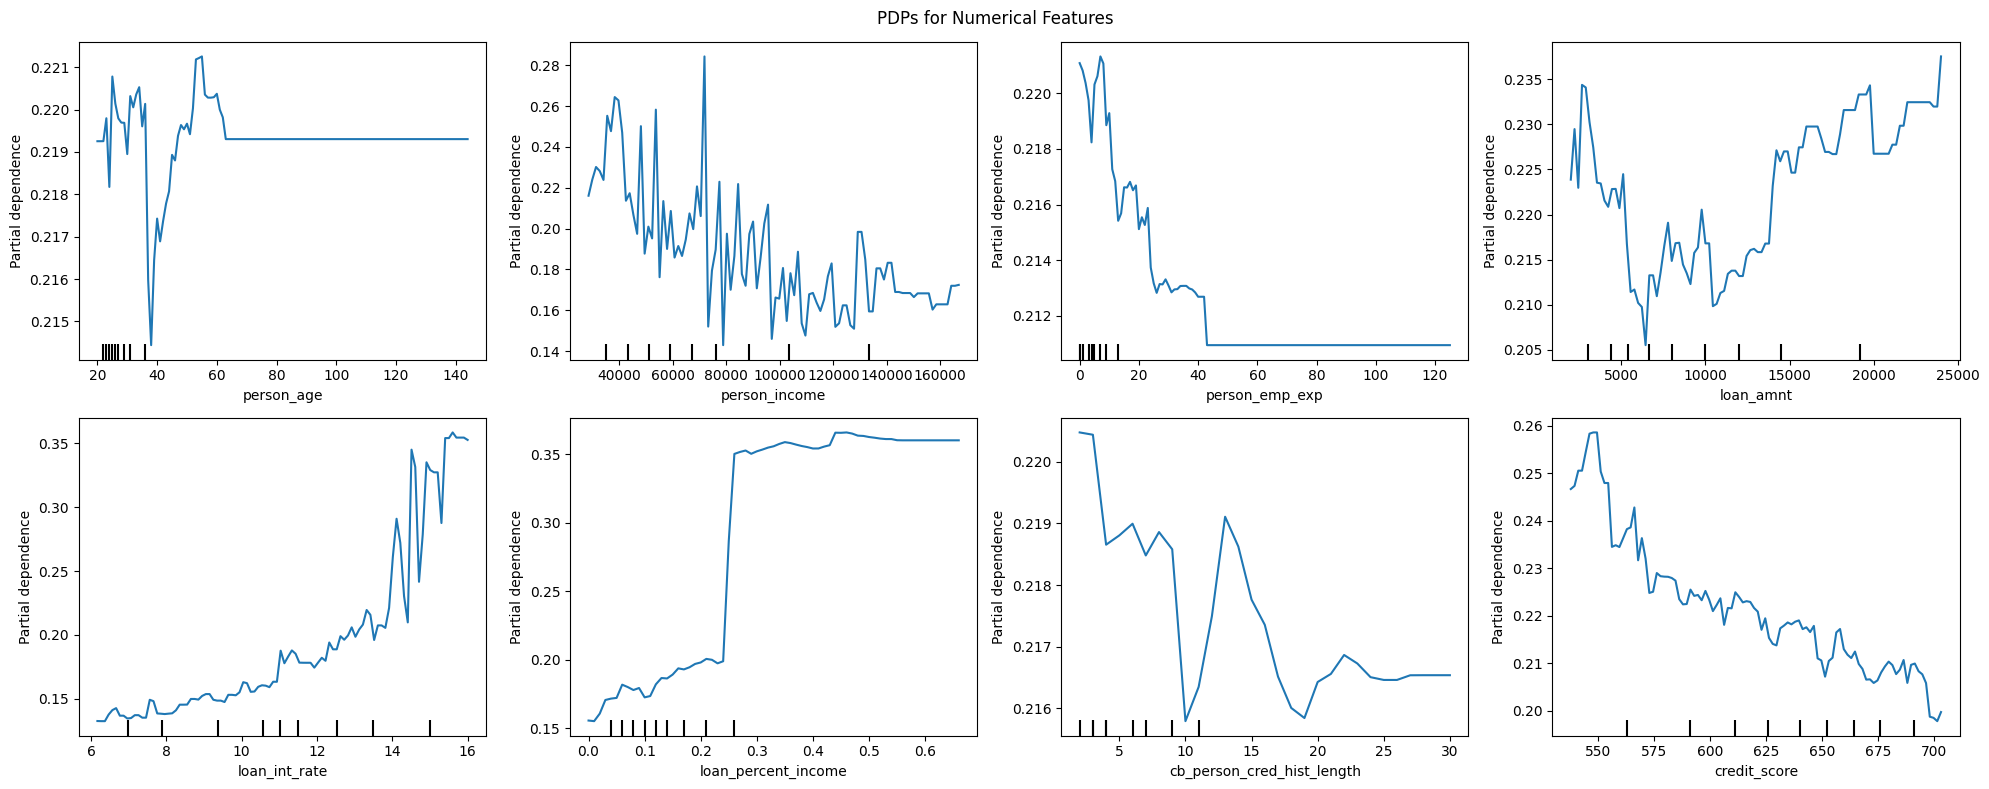

In [5]:
# visualize pdps for numerical features
X_train[numerical] = X_train[numerical].astype(float)

fig, ax = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle("PDPs for Numerical Features")
for i, feat in enumerate(numerical):
    PartialDependenceDisplay.from_estimator(estimator=xgb_model, X=X_train, features=[feat], ax=ax.flatten()[i])
plt.tight_layout()

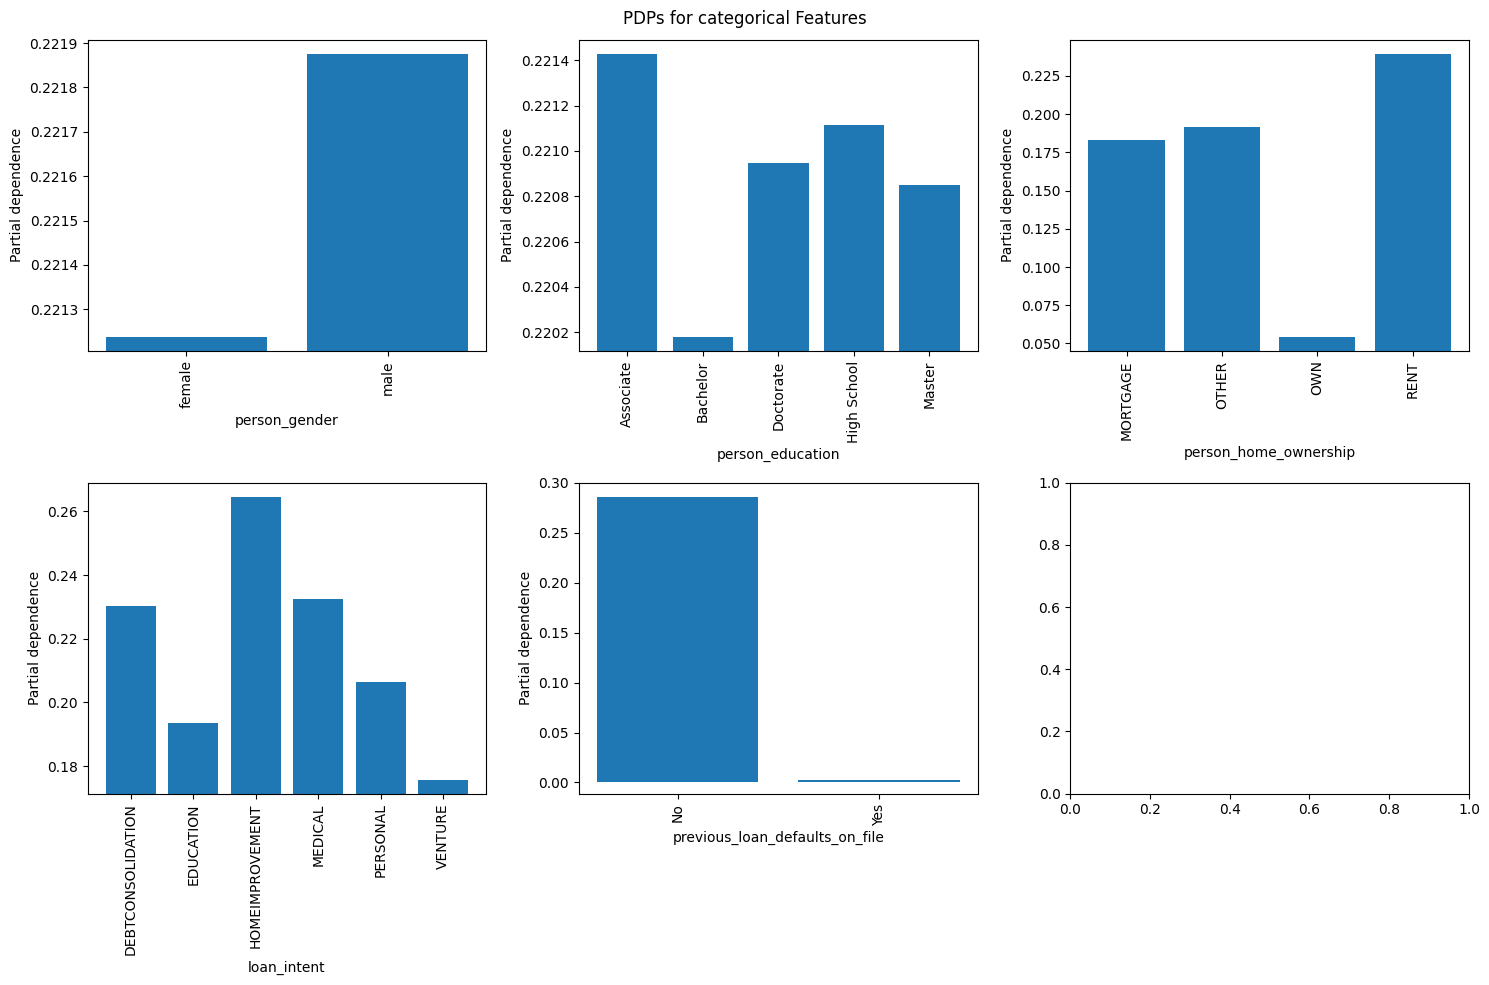

In [6]:
# visualize pdps for categorical features
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("PDPs for categorical Features")
for i, feat in enumerate(categorical):
    PartialDependenceDisplay.from_estimator(estimator=xgb_model, X=X_train, features=[feat], categorical_features=[feat], ax=ax.flatten()[i])
plt.tight_layout()